<a href="https://colab.research.google.com/github/subin60/modules/blob/main/transfer_learning_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/subin60/modules/main/helper_functions_tf.py

--2023-05-19 05:48:58--  https://raw.githubusercontent.com/subin60/modules/main/helper_functions_tf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8102 (7.9K) [text/plain]
Saving to: ‘helper_functions_tf.py’

helper_functions_tf 100%[===================>]   7.91K  --.-KB/s    in 0s      

2023-05-19 05:48:58 (96.1 MB/s) - ‘helper_functions_tf.py’ saved [8102/8102]



In [ ]:
from helper_functions_tf import download_and_unzip

In [ ]:
download_and_unzip('https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip')

In [ ]:
import os

In [ ]:
def walk_through_dir(dir_path):
    """
    Walks through a directory, printing out the number of directories and 
    images (files) in each, along with each subdirectory's name.
    
    Args:
        dir_path (str): The path of the target directory to walk through.
    
    Returns:
        None. However, as a side effect, this function will print:
        - The number of subdirectories in `dir_path`
        - The number of images (or files) in each subdirectory
        - The name of each subdirectory
    """
    # Use os.walk to generate a 3-tuple for each directory it traverses 
    for dirpath, dirnames, filenames in os.walk(dir_path):
        # Get the count of directories and files
        num_dirs = len(dirnames)
        num_files = len(filenames)
        
        # Print the counts and the current directory path
        print(f"There are {num_dirs} directories and {num_files} images in '{dirpath}'.")

In [ ]:
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classe

In [ ]:
from helper_functions_tf import get_class_names

In [ ]:
class_names=get_class_names('/content/10_food_classes_10_percent/test')
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percentage = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                               image_size=IMG_SIZE,
                                                                               batch_size=BATCH_SIZE,
                                                                               label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                              image_size=IMG_SIZE,
                                                                              batch_size=BATCH_SIZE,
                                                                              label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
calss_names=train_data_10_percentage.class_names
num_class=len(class_names)

In [ ]:
for images, labels in train_data_10_percentage.take(1):
  print(images, labels)

tf.Tensor(
[[[[ 30.413265   14.413265   27.413265 ]
   [ 31.         15.         28.       ]
   [ 31.         15.         28.       ]
   ...
   [ 60.         44.         44.       ]
   [ 60.         44.         44.       ]
   [ 60.         44.         44.       ]]

  [[ 30.071428   14.071428   27.071428 ]
   [ 30.071428   14.071428   27.071428 ]
   [ 30.071428   14.071428   27.071428 ]
   ...
   [ 60.         44.         45.       ]
   [ 60.         44.         45.       ]
   [ 60.         44.         45.       ]]

  [[ 26.142857   12.142857   27.142857 ]
   [ 25.586735   11.586735   26.586735 ]
   [ 24.571428   10.571428   25.571428 ]
   ...
   [ 60.         44.         45.       ]
   [ 60.         44.         45.       ]
   [ 60.         44.         45.       ]]

  ...

  [[ 37.785736   17.785736   29.571472 ]
   [ 37.785736   17.785736   29.571472 ]
   [ 38.         18.         29.785736 ]
   ...
   [ 37.571472   24.         36.785736 ]
   [ 37.785736   24.214264   38.571472 ]
   [ 

In [ ]:
Resnet50v2 = tf.keras.applications.ResNet50V2(input_shape=IMG_SIZE+(3,),
                                                    classes=1000,
                                                    classifier_activation='softmax')
Resnet50v2.trainable = False

In [ ]:

Resnet50v2_model = tf.keras.Model(Resnet50v2.input,
                                  tf.keras.layers.Dense(num_class, activation='softmax')(Resnet50v2.output))

In [ ]:
Resnet50v2_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
Resnet50v2_history = Resnet50v2_model.fit(train_data_10_percentage,
                                          validation_data=test_data,
                                          steps_per_epoch=len(train_data_10_percentage),
                                          validation_steps=len(test_data),
                                          epochs=5,
                                          verbose=1)

Epoch 1/5
24/24 [==============================] - 23s 490ms/step - loss: 2.3081 - accuracy: 0.1133 - val_loss: 2.3087 - val_accuracy: 0.1116
Epoch 2/5
24/24 [==============================] - 13s 530ms/step - loss: 2.3031 - accuracy: 0.1387 - val_loss: 2.3053 - val_accuracy: 0.1120
Epoch 3/5
24/24 [==============================] - 10s 389ms/step - loss: 2.2988 - accuracy: 0.1400 - val_loss: 2.3019 - val_accuracy: 0.1120
Epoch 4/5
24/24 [==============================] - 10s 409ms/step - loss: 2.2944 - accuracy: 0.1413 - val_loss: 2.2988 - val_accuracy: 0.1116
Epoch 5/5
24/24 [==============================] - 10s 406ms/step - loss: 2.2903 - accuracy: 0.1427 - val_loss: 2.2955 - val_accuracy: 0.1116


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

x = base_model(inputs)

print(f'Shape after passing inputs through base model: {x.shape}')

x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

print(f'Shape after GlobalAveragePooling2D: {x.shape}')

outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)


Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)


In [ ]:
model_0.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [ ]:
from helper_functions_tf import create_tensorboard_callback

In [ ]:
model_0.history = model_0.fit(train_data_10_percentage,
                              validation_data=test_data,
                              steps_per_epoch=len(train_data_10_percentage),
                              validation_steps=int(0.25 * len(test_data)),
                              epochs=5,
                              verbose=1,
                              callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                     experiment_name='10_percent_feature_extraction')])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230518-175315
Epoch 1/5
24/24 [==============================] - 12s 190ms/step - loss: 1.9334 - accuracy: 0.4093 - val_loss: 1.2924 - val_accuracy: 0.7747
Epoch 2/5
24/24 [==============================] - 5s 176ms/step - loss: 1.1255 - accuracy: 0.7733 - val_loss: 0.8659 - val_accuracy: 0.8010
Epoch 3/5
24/24 [==============================] - 5s 175ms/step - loss: 0.8014 - accuracy: 0.8307 - val_loss: 0.6770 - val_accuracy: 0.8651
Epoch 4/5
24/24 [==============================] - 5s 175ms/step - loss: 0.6409 - accuracy: 0.8547 - val_loss: 0.6055 - val_accuracy: 0.8520
Epoch 5/5
24/24 [==============================] - 4s 133ms/step - loss: 0.5659 - accuracy: 0.8733 - val_loss: 0.5500 - val_accuracy: 0.8684


In [ ]:
from helper_functions_tf import plot_history


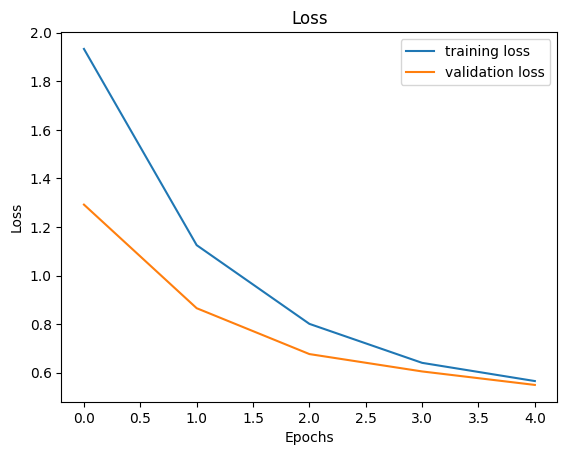

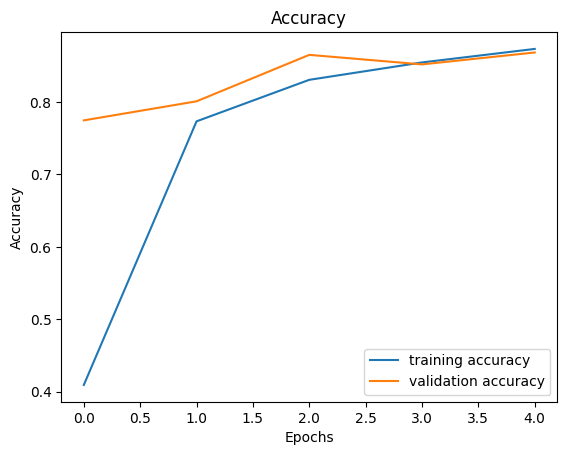

In [ ]:
plot_history(model_0.history)

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 0.5492 - accuracy: 0.8672


[0.5491715669631958, 0.8672000169754028]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

In [ ]:
base_model.summary()

In [ ]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
import tensorflow as tf

In [ ]:
tensor = tf.random.normal((1,4,4,3), seed=42)
tensor

<tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
array([[[[-0.28077507, -0.13775212, -0.6763296 ],
         [ 0.02458041, -0.8935846 , -0.8284734 ],
         [ 1.2068944 ,  1.3810157 , -1.4557977 ],
         [-0.24621388, -1.3608406 ,  1.0879604 ]],

        [[-0.3511659 , -0.5138534 ,  3.4117208 ],
         [ 0.05885483,  0.8918024 , -0.75288326],
         [-0.4335728 ,  2.4538531 ,  0.31374422],
         [-0.52736205,  0.85249925, -0.53791326]],

        [[ 1.0512363 ,  0.09101018,  0.04078108],
         [ 0.8860364 , -0.6597835 ,  2.7017565 ],
         [ 0.94328713,  0.14154701, -0.6864907 ],
         [ 0.6209476 ,  1.6376426 , -0.23392637]],

        [[ 1.1947398 , -0.32401976,  0.7910867 ],
         [-1.5794586 ,  0.18436149, -0.32279873],
         [-0.33128345, -0.7493778 , -1.2554842 ],
         [ 0.9092039 ,  0.03424382,  1.2578013 ]]]], dtype=float32)>

In [ ]:
avg_pool_2d = tf.keras.layers.GlobalAveragePooling2D()
avg_pool_2d(tensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.1966218 , 0.18929772, 0.17842212]], dtype=float32)>

In [ ]:
tf.reduce_mean(tensor, axis=(1,2))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.1966218 , 0.18929772, 0.17842212]], dtype=float32)>

In [ ]:
tf.reduce_mean(tensor[0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.18811388>

In [ ]:
max_pool_2d = tf.keras.layers.GlobalMaxPool2D()
max_pool_2d(tensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.2068944, 2.4538531, 3.4117208]], dtype=float32)>

In [ ]:
tf.reduce_max(tensor, axis=(1,2))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.2068944, 2.4538531, 3.4117208]], dtype=float32)>

In [ ]:
c

InvalidArgumentError: ignored

In [ ]:
tensor_1 = tf.random.normal((1,1,1,3), seed=42)
tensor_1

<tf.Tensor: shape=(1, 1, 1, 3), dtype=float32, numpy=array([[[[ 1.5784944 , -0.62857205, -0.9198288 ]]]], dtype=float32)>

In [ ]:
tf.reduce_max(tensor_1,axis=(3))

<tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[1.5784944]]], dtype=float32)>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-05-18 19:59:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   144MB/s    in 0.9s    

2023-05-18 19:59:03 (144 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
from helper_functions_tf import download_and_unzip, walk_through_dir

In [ ]:
download_and_unzip('https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip')

In [ ]:
train_dir_1_percent = '/content/10_food_classes_1_percent/train'
test_dir = '/content/10_food_classes_1_percent/test'

In [ ]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percen

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
EPOCH=5

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode='categorical')
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
tf.keras.layers.experimental.preprocessing()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [ ]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescaling(1/255.)
], name='data_augmentation')

In [ ]:
augmented_img = data_augmentation(img, training=True)



In [ ]:
from helper_functions_tf import view_random_image
import matplotlib.pyplot as plt

Image shape: (384, 512, 3)


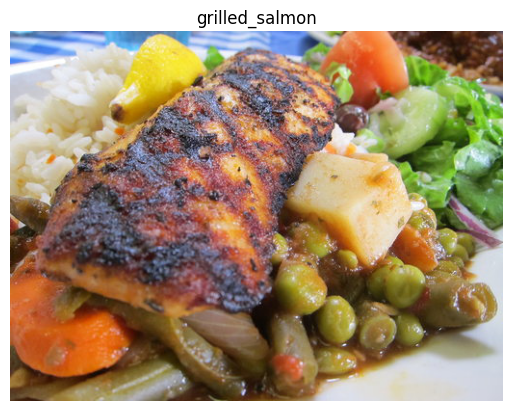

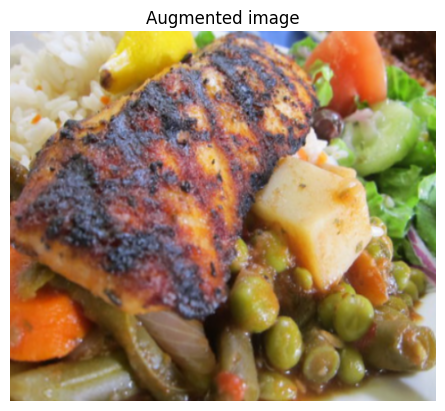

In [ ]:
img = view_random_image('/content/10_food_classes_1_percent/test','grilled_salmon')
plt.imshow(img)
augmented_img = data_augmentation(img, training=True)
plt.figure()
plt.title('Augmented image')
plt.imshow(augmented_img);
plt.axis("off");

In [ ]:
from keras.engine.sequential import training
base_model_1 = tf.keras.applications.EfficientNetB0(include_top=False)

base_model_1.trainable = False

inputs = tf.keras.Input(shape=(224,224,3), name='input_layer')

x = data_augmentation(inputs)

x = base_model_1(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model_1 = tf.keras.Model(inputs, outputs)

In [ ]:

from helper_functions_tf import create_tensorboard_callback, plot_history

In [ ]:
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_model_1 = model_1.fit(train_data_1_percent,
                              validation_data = test_data,
                              validation_steps=len(test_data),
                              steps_per_epoch=len(train_data_1_percent),
                              verbose=1,
                              epochs=EPOCH,
                              callbacks=[create_tensorboard_callback('tensorboard_callback','model_1')])

Saving TensorBoard log files to: tensorboard_callback/model_1/20230518-214744
Epoch 1/5
3/3 [==============================] - 19s 6s/step - loss: 1.3007 - accuracy: 0.8286 - val_loss: 1.5475 - val_accuracy: 0.6080
Epoch 2/5
3/3 [==============================] - 5s 3s/step - loss: 1.0627 - accuracy: 0.9429 - val_loss: 1.4453 - val_accuracy: 0.6508
Epoch 3/5
3/3 [==============================] - 5s 3s/step - loss: 0.9326 - accuracy: 0.9571 - val_loss: 1.3616 - val_accuracy: 0.6824
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 0.8121 - accuracy: 0.9714 - val_loss: 1.2889 - val_accuracy: 0.7032
Epoch 5/5
3/3 [==============================] - 6s 3s/step - loss: 0.6975 - accuracy: 0.9857 - val_loss: 1.2267 - val_accuracy: 0.7116


In [42]:
plot_history(history_model_1)

NameError: ignored

In [43]:
!wget https://raw.githubusercontent.com/subin60/modules/main/helper_functions_tf.py

--2023-05-19 08:14:46--  https://raw.githubusercontent.com/subin60/modules/main/helper_functions_tf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8102 (7.9K) [text/plain]
Saving to: ‘helper_functions_tf.py.1’

helper_functions_tf 100%[===================>]   7.91K  --.-KB/s    in 0s      

2023-05-19 08:14:46 (88.7 MB/s) - ‘helper_functions_tf.py.1’ saved [8102/8102]



In [44]:
import helper_functions_tf as hf

In [45]:
hf.download_and_unzip('https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip')

In [46]:
hf.walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classe

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import Sequential, Model
from tensorflow.keras import Input
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetB0

import matplotlib.pyplot as plt

In [48]:
data_augmentation_10_percent = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescaling(1/255.)
], name='data_augmentation_10_percent')

In [50]:
train_dir_10_percent='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'

In [51]:
BATCH_SIZE=32
IMG_SIZE=(224,224)
EPOCH=5
train_data_10_percent = image_dataset_from_directory(train_dir_10_percent,
                                                     label_mode='categorical',
                                                     batch_size=BATCH_SIZE,
                                                     image_size=IMG_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         label_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         image_size=IMG_SIZE
                                         )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Image shape: (512, 512, 3)


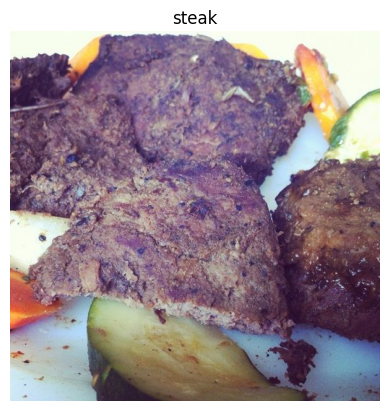

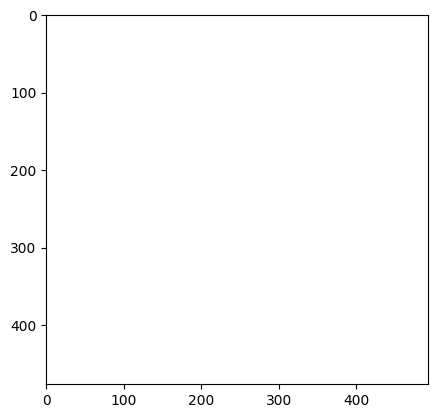

In [52]:
img = hf.view_random_image('/content/10_food_classes_10_percent/test','steak')
plt.figure()
plt.imshow(data_augmentation_10_percent(img, training=True))

In [53]:

base_model_2 = EfficientNetB0(include_top=False)
base_model_2.trainable = False

inputs=Input(shape=(224,224,3),name='input_layer_10_percent')

x = data_augmentation_10_percent(inputs)
x = base_model_2(x, training=False)
x = GlobalAveragePooling2D(name='global_average_pooling_layer_10_percent')(x)

outputs = Dense(10, activation='softmax', name='output_layer_10_percent')(x)

model_2 = Model(inputs,outputs)






In [54]:
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoints.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch',
                                                         verbose=1)

Saving TensorBoard log files to: tensorboard_callback/model_2/20230519-081519
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0007 - accuracy: 0.3640
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 42s 1s/step - loss: 2.0007 - accuracy: 0.3640 - val_loss: 1.4470 - val_accuracy: 0.6868
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3054 - accuracy: 0.6920
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 18s 765ms/step - loss: 1.3054 - accuracy: 0.6920 - val_loss: 0.9947 - val_accuracy: 0.7900
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9843 - accuracy: 0.7760
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 17s 720ms/step - loss: 0.9843 - accuracy: 0.7760 - val_loss: 0.7981 - val_accuracy: 0.8176
Epoch 4/5


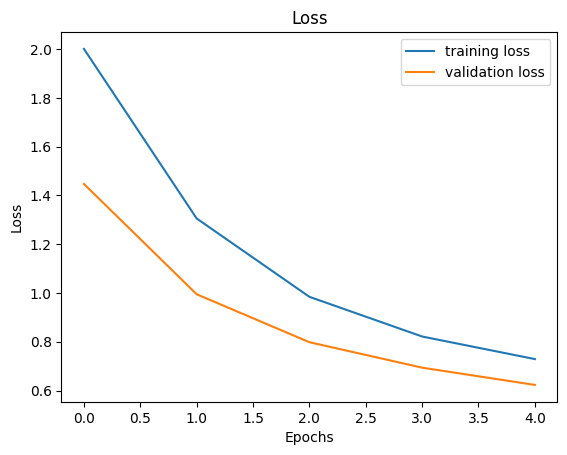

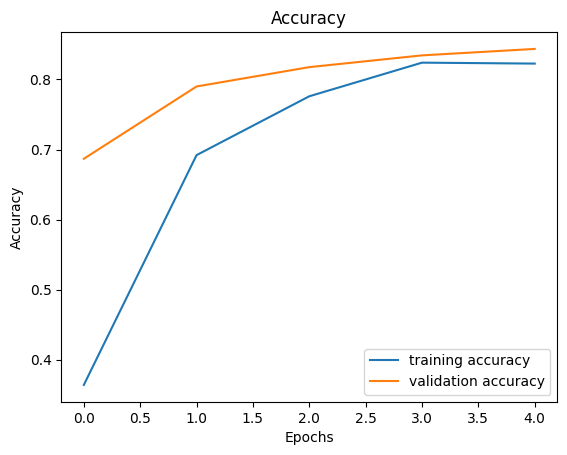

In [55]:
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])


model_2.history = model_2.fit(train_data_10_percent,
                              validation_data=test_data,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_steps=len(test_data),
                              epochs=EPOCH,
                              verbose=1,
                              callbacks=[hf.create_tensorboard_callback('tensorboard_callback','model_2'), checkpoint_callback])
hf.plot_history(model_2.history)

In [56]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_10_percent (Inp  [(None, 224, 224, 3)]    0         
 utLayer)                                                        
                                                                 
 data_augmentation_10_percen  (None, None, 3)          0         
 t (Sequential)                                                  
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r_10_percent (GlobalAverage                                     
 Pooling2D)                                                      
                                                                 
 output_layer_10_percent (De  (None, 10)               1281

In [59]:
model_2.evaluate(test_data)

79/79 [==============================] - 8s 88ms/step - loss: 0.6230 - accuracy: 0.8436


[0.6230036020278931, 0.8435999751091003]

In [58]:
model_2_w = load_weights(checkpoint_path)

NameError: ignored